In [1]:
#Parte 2:
#   1-Para las imágenes img1_tp. y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.



%matplotlib inline  
#%matplotlib qt
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [9]:
# Lee las dos imágenes en escala de grises
imagen1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)


# Lee las dos imágenes en escala de grises
imagen1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
imagen2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

# Dimensión de la imagen
print(f'Tamaño imagen 1: {imagen1.shape} pix')
print(imagen1)

print(f'Tamaño imagen 2: {imagen2.shape} pix')
print(imagen2)

Tamaño imagen 1: (288, 287) pix
[[  2   3   4 ...  13  13  14]
 [ 14  14  14 ...  20  20  20]
 [ 20  20  20 ...  22  22  22]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Tamaño imagen 2: (288, 287) pix
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


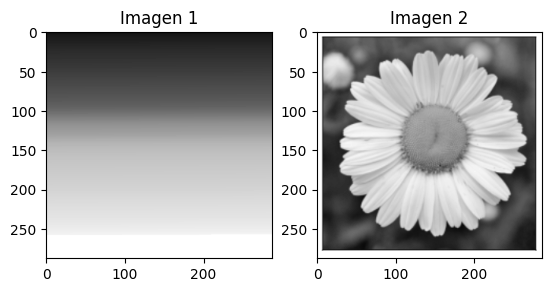

In [10]:
# Visualiza las dos imágenes
plt.subplot(1, 2, 1)
plt.imshow(imagen1, cmap='gray')
plt.title('Imagen 1')

plt.subplot(1, 2, 2)
plt.imshow(imagen2, cmap='gray')
plt.title('Imagen 2')

plt.show()



In [13]:
# Visualiza las imágenes
cv.imshow('Imagen 1', imagen1)
cv.imshow('Imagen 2', imagen2)

# Espera hasta que se presione una tecla y luego cierra las ventanas
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
#   2-Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
#   Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
#   considera que puede ser de utilidad tomar como ‘features’ a los histogramas?


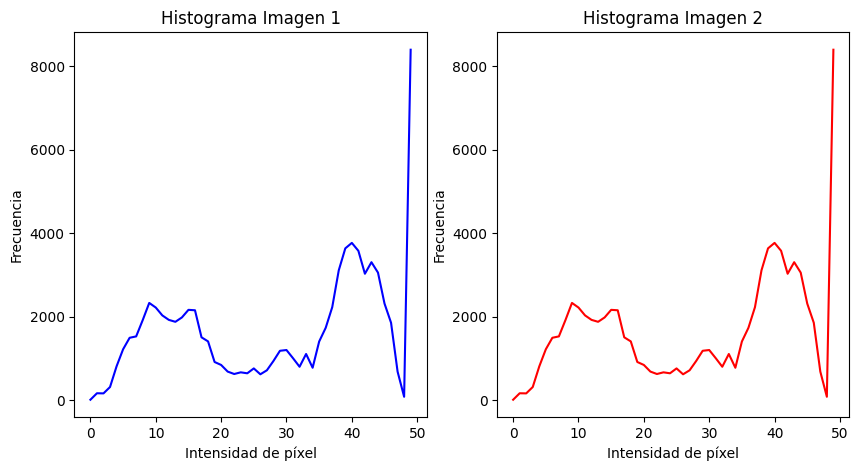

In [16]:
img1 = cv.imread('img1_tp.png')
img2 = cv.imread('img2_tp.png')
# Elija el número de bins que crea conveniente
num_bins = 50

# Calcula los histogramas
hist_imagen1 = cv.calcHist([img1], [0], None, [num_bins], [0, 256])
hist_imagen2 = cv.calcHist([img2], [0], None, [num_bins], [0, 256])

# Grafica los histogramas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_imagen1, color='b')
plt.title('Histograma Imagen 1')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.plot(hist_imagen2, color='r')
plt.title('Histograma Imagen 2')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')

# Muestra los histogramas en ventanas emergentes
plt.show()


Consigna: Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
Respuesta:   
Los histogramas de dos imágenes son prácticamente idénticos, esto sugiere que las distribuciones de intensidades de píxeles en ambas imágenes son muy similares. En este caso, los histogramas pueden no ser características útiles para distinguir entre estas dos imágenes específicas.

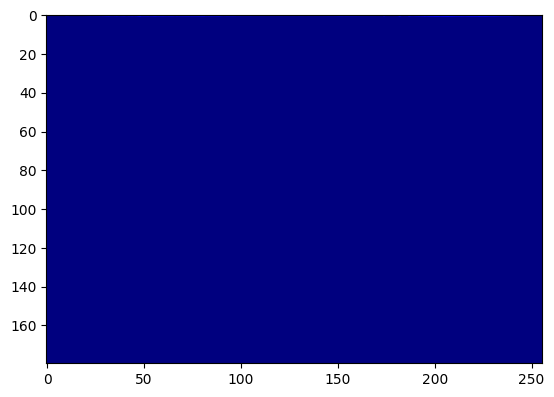

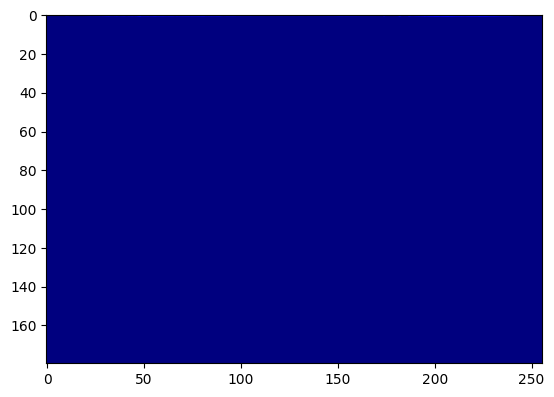

In [18]:
hsv1 = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
hist1 = cv.calcHist([hsv1], channels=[0, 2], mask=None, histSize=[180, 256], ranges=[0, 180, 0, 255])
plt.figure()
plt.imshow(hist1, cmap='jet')
plt.show()

hsv2 = cv.cvtColor(img2, cv.COLOR_BGR2HSV)
hist2 = cv.calcHist([hsv2], channels=[0, 2], mask=None, histSize=[180, 256], ranges=[0, 180, 0, 255])
plt.figure()
plt.imshow(hist2, cmap='jet')
plt.show()

In [31]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
#%matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

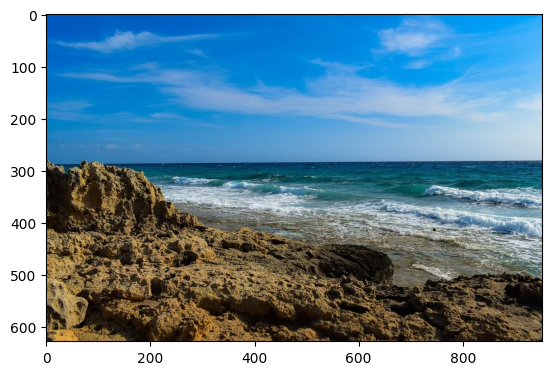

In [32]:
# Cargar la imagen color
img_color = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB)
plt.show()

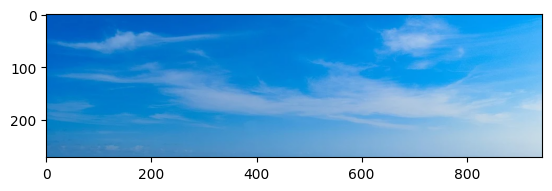

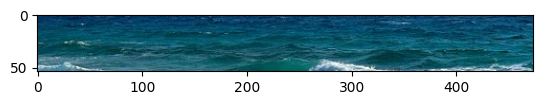

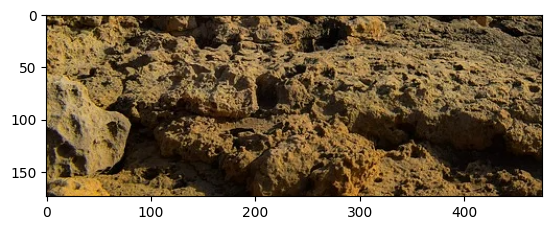

In [38]:
# Tomamos una muestra del cielo
img_muestra_cielo = imgRGB[0:272, 0:944,:]
plt.figure(2)
plt.imshow(img_muestra_cielo)
plt.show()

# Tomamos una muestra del cielo
img_muestra_agua = imgRGB[285:339, 470:944,:]
plt.figure(2)
plt.imshow(img_muestra_agua)
plt.show()

# Tomamos una muestra del cielo
img_muestra_tierra = imgRGB[450:624, 0:475 ,:]
plt.figure(2)
plt.imshow(img_muestra_tierra)
plt.show()

In [41]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
def segmentar(color_mean,color_std,segmento):
    n_sigma = 3
    mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
    img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

    plt.figure(3)
    plt.imshow(img_segmentada)
    plt.title('Segmentacion de '+segmento)
    plt.show()

[60.80524831754735, 150.52145516575274, 216.04247414007975]
[57.77849745962121, 29.189458512750512, 16.16267070905737]


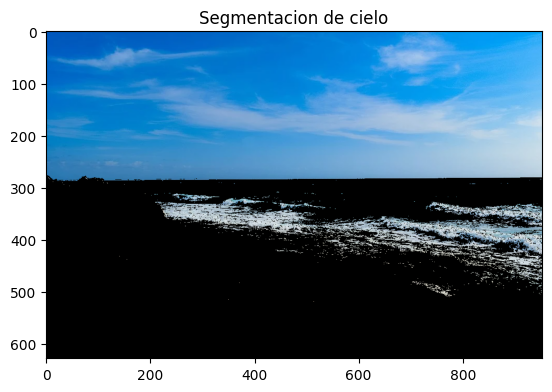

[21.811142365994687, 86.50007813720894, 108.03008282544147]
[32.67334495861097, 28.145721343324507, 25.911693863892722]


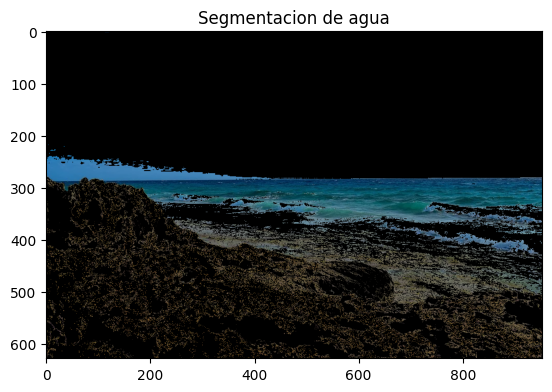

[98.23891107078039, 76.41150635208712, 45.079455535390196]
[58.90716192533775, 51.74653701117818, 37.25654316569072]


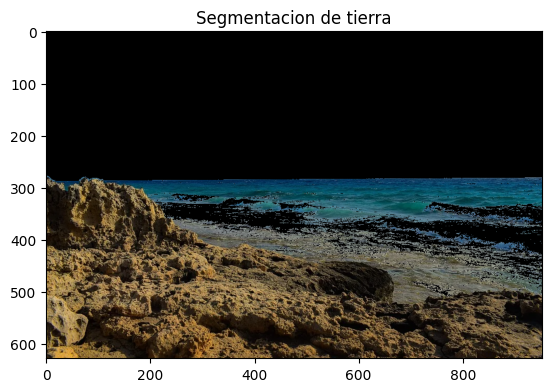

In [42]:
# Calculamos un modelo estadístico sencillo para caracterizar 
#el color del cielo en el espacio RGB
color_mean_cielo, color_std_cielo = cv.meanStdDev(img_muestra_cielo)
print(color_mean_cielo.flatten().tolist())
print(color_std_cielo.flatten().tolist())
segmentar(color_mean_cielo,color_std_cielo,'cielo')

# Calculamos un modelo estadístico sencillo para caracterizar 
#el color del agua en el espacio RGB
color_mean_agua, color_std_agua = cv.meanStdDev(img_muestra_agua)
print(color_mean_agua.flatten().tolist())
print(color_std_agua.flatten().tolist())
segmentar(color_mean_agua,color_std_agua,'agua')

# Calculamos un modelo estadístico sencillo para caracterizar
# el color de la tierra en el espacio RGB
color_mean_tierra, color_std_tierra = cv.meanStdDev(img_muestra_tierra)
print(color_mean_tierra.flatten().tolist())
print(color_std_tierra.flatten().tolist())
segmentar(color_mean_tierra,color_std_tierra,'tierra')